# Bernstein-Vazirani Algorithm

In [3]:
from qiskit import *
%matplotlib inline
from qiskit.tools.visualization import plot_histogram

In [6]:
secretNumber = '10100101'

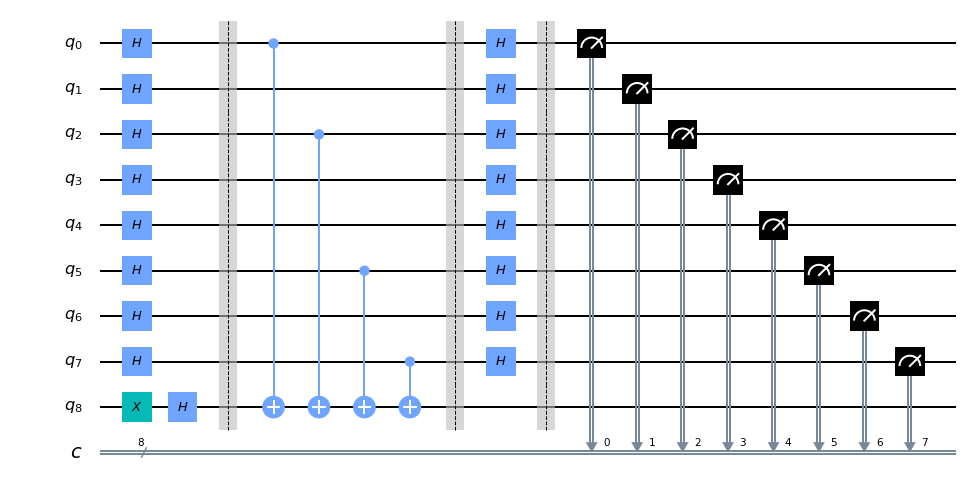

In [9]:
numLength = len(secretNumber)

circuit = QuantumCircuit(numLength+1, numLength)

circuit.h(range(numLength))
circuit.x(numLength)
circuit.h(numLength)

circuit.barrier()

for ii, yesno in enumerate(reversed(secretNumber)):
    if yesno =='1':
        circuit.cx(ii, numLength)

circuit.barrier()

circuit.h(range(numLength))

circuit.barrier()

circuit.measure(range(numLength), range(numLength))

circuit.draw(output='mpl')

# Information regarding the circuit and the algorithm

- The circuit elements between barriers one and two constitute the black box wherein the secret number is contained. This black box allows what is the equivalent of the classical and operation.
- The circuit before barrier one and between barriers two and three form the algorithm.
- In the Hadamard transformed basis (which corresponds to the x-axis), the control and target qubits are flipped (usually the one with the dot is the control qubit). This is how the algorithm works.

In [12]:
simulator = Aer.get_backend('qasm_simulator')
counts = execute(circuit, backend = simulator, shots = 1).result().get_counts()
print(counts)

{'10100101': 1}
